In [857]:
import numpy as np
import sys

In [858]:
p = 6625
nu=0.3
E=31*10**6
G=E/(2*(1+nu))

Ri=6
Ro=7
Nr=3
Nh=10
Deltr=(Ro-Ri)/(2*Nr)
Delth=(np.pi/2)/(2*Nh)

def xx(r,theta):
    return r*np.cos(theta)

def yy(r,theta):
    return r*np.sin(theta)

Numelem = Nr * Nh

Numnodes= (Nh+1) * (2*Nr+1) + Nh * (Nr+1)

NPE=8


In [859]:
#Title
CARD1 = 'PIPE: ELASTIC PLAIN STRAIN UNDER INTERNAL PRESSURE'

In [860]:
#ITYPE, IGRAD, ITEM, NEIGN
CARD2 = np.array((2,1,0,0))

In [861]:
#IELTYP, NPE, MESH, NPRNT
CARD4 = np.array((1,8,0,0))

In [862]:
#NEM, NNM
CARD5 = np.array((Numelem,Numnodes))

In [863]:
# NOD
CARD6=np.zeros((Nh*Nr,NPE))

for i in range(0,Nh):
    for j in range(0,Nr):
        ELENUM = i * Nr + j 
        for k in range(0,NPE):
            if   k==0:
                CARD6[ELENUM,k] = i * (2 * Nr + 1) + i * (Nr + 1) + 2 * j + 1
            elif k==1:
                CARD6[ELENUM,k]= i * (2 * Nr + 1) + i * (Nr + 1) + 2 * j + 3
            elif k==2:
                CARD6[ELENUM,k]= (i + 1) * (2 * Nr + 1) + (i + 1) * (Nr + 1) + 2 * j + 3
            elif k==3:
                CARD6[ELENUM,k]= (i + 1) * (2 * Nr + 1) + (i + 1) * (Nr + 1) + 2 * j + 1
            elif k==4:
                CARD6[ELENUM,k]= i * (2 * Nr + 1) + i * (Nr + 1) + 2 * j + 2
            elif k==5:
                CARD6[ELENUM,k]= (i + 1) * (2 * Nr + 1) + i * (Nr + 1) +  j + 2
            elif k==6:
                CARD6[ELENUM,k]= (i + 1) * (2 * Nr + 1) + (i + 1) * (Nr + 1) + 2 * j + 2
            elif k==7:
                CARD6[ELENUM,k]= (i + 1) * (2 * Nr + 1) +  i * (Nr + 1) +  j + 1

In [864]:
#GLXY(I,J)
CARD7 = np.zeros((Numnodes * 2))
n = 0
for i in range(0, 2 * Nh + 1):
    if i % 2 == 0:
        for j in range(0, 2 * Nr + 1):
            r =  Ri + j * Deltr
            theta = i * Delth
            CARD7[n] = xx(r,theta)
            n = n+1
            CARD7[n] = yy(r, theta)
            n = n+1
            
    if  i % 2 != 0:
        for j in range(0, Nr + 1):
            r =  Ri + j * Deltr * 2
            theta = i * Delth
            CARD7[n] = xx(r,theta)
            n = n+1
            CARD7[n] = yy(r, theta)
            n = n+1
            



In [865]:
# NSPV
CARD15 = 4 * Nr + 2

In [866]:
# ISPV
n = 1
CARD16_1 = np.zeros((2*Nr + 1,2))

for i in range(0, 2* Nr + 1):
    CARD16_1[i,0] = n
    n = n + 1
n=1
for i in range(0, 2* Nr + 1):
    CARD16_1[i ,1] = 2

n = Numnodes - (2*Nr)
CARD16_2 = np.zeros((2*Nr + 1 ,2))
for i in range(0, 2 * Nr + 1):
    CARD16_2[i,0] = n
    n = n + 1
    
for i in range(0, 2*Nr + 1):
    CARD16_2[i ,1] = 1
    
CARD16 = np.concatenate((CARD16_1, CARD16_2)).flatten()

In [867]:
#VSPV
CARD17 =  np.zeros(( 2 * (2*(Nr + 1))))

In [868]:
#NSSV
CARD18 = 2 * (2 * Nh + 1 )

In [869]:
#ISSV
n = 0
CARD19 = np.zeros(( 2 * (2 * Nh + 1 ),2))
for i in range(0, Nh ):
        CARD19[n,0] = i * (2 * Nr + 1) + i * (Nr + 1) + 1
        CARD19[n + 1,0] = i * (2 * Nr + 1) + i * (Nr + 1) + 1
        CARD19[n + 2,0] = (i + 1) * (2 * Nr + 1) +  i * (Nr + 1) +  1
        CARD19[n + 3,0] = (i + 1) * (2 * Nr + 1) +  i * (Nr + 1) +  1
        n = n+4
CARD19[n, 0] = Nh * (2 * Nr + 1) + Nh * (Nr + 1) + 1
CARD19[n+1, 0] = Nh * (2 * Nr + 1) + Nh * (Nr + 1) + 1
n=0
for i in range(0, 2 * Nh + 1):
    CARD19[n ,1] = 1
    CARD19[n + 1 ,1] = 2
    n = n+2

CARD19 = CARD19.flatten()

In [870]:
#VSSV
CARD20 = np.zeros(((4 * Nh + 2 )))
for i in range(0, (4 * Nh + 1 ), 2):
    if i % 4 == 0:
        CARD20[i] = 1/6 * p * 2 * Delth * Ri * np.cos(i/2*Delth)
        CARD20[i+1] = 1/6 * p * 2 * Delth * Ri * np.sin(i/2*Delth)
    else:
        CARD20[i] = 4/6 * p * 2 * Delth * Ri * np.cos(i/2*Delth)
        CARD20[i+1] = 4/6 * p * 2 * Delth * Ri * np.sin(i/2*Delth)
        
        
        

In [871]:
#LNSTRS
CARD29 = 0

In [872]:
# E1,E2,ANU12,G12,THKNS
CARD30 = np.array((E,E, nu, G , 1))

In [873]:
# F0, FX, FY
CARD32 = np.array((0,0,0))

In [874]:
print(CARD1)
np.savetxt(sys.stdout, CARD2[None], delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD4[None], delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD5[None], delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD6, delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD7[None], delimiter = ' ', fmt="%.8f")
print(CARD15)
np.savetxt(sys.stdout, CARD16[None], delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD17[None], delimiter = '   ', fmt="%.0f")
print(CARD18)
np.savetxt(sys.stdout, CARD19[None], delimiter = ' ', fmt="%.0f")
np.savetxt(sys.stdout, CARD20[None], delimiter = ' ', fmt="%.8f")
print(CARD29)
np.savetxt(sys.stdout, CARD30[None], delimiter = ' ', fmt="%.1f")
np.savetxt(sys.stdout, CARD32[None], delimiter = ' ', fmt="%.0f")

PIPE: ELASTIC PLAIN STRAIN UNDER INTERNAL PRESSURE
2 1 0 0
1 8 0 0
30 117
1 3 14 12 2 9 13 8
3 5 16 14 4 10 15 9
5 7 18 16 6 11 17 10
12 14 25 23 13 20 24 19
14 16 27 25 15 21 26 20
16 18 29 27 17 22 28 21
23 25 36 34 24 31 35 30
25 27 38 36 26 32 37 31
27 29 40 38 28 33 39 32
34 36 47 45 35 42 46 41
36 38 49 47 37 43 48 42
38 40 51 49 39 44 50 43
45 47 58 56 46 53 57 52
47 49 60 58 48 54 59 53
49 51 62 60 50 55 61 54
56 58 69 67 57 64 68 63
58 60 71 69 59 65 70 64
60 62 73 71 61 66 72 65
67 69 80 78 68 75 79 74
69 71 82 80 70 76 81 75
71 73 84 82 72 77 83 76
78 80 91 89 79 86 90 85
80 82 93 91 81 87 92 86
82 84 95 93 83 88 94 87
89 91 102 100 90 97 101 96
91 93 104 102 92 98 103 97
93 95 106 104 94 99 105 98
100 102 113 111 101 108 112 107
102 104 115 113 103 109 114 108
104 106 117 115 105 110 116 109
6.00000000 0.00000000 6.16666667 0.00000000 6.33333333 0.00000000 6.50000000 0.00000000 6.66666667 0.00000000 6.83333333 0.00000000 7.00000000 0.00000000 5.98150400 0.47075457 6.3138097

In [894]:
results=np.loadtxt('C:/Users/Nastac/Documents/MikkoKarkkainen/School/Intro to FEM/FEM2DUsers/run/3-row-results.txt')

In [895]:
x = results[::,0]
y = results[::,1]
sigma_x = results[::,2]
sigma_y = results[::,3]
sigma_z = results[::,4]

In [896]:
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

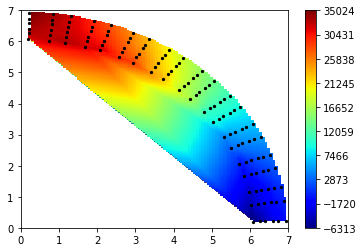

In [897]:
plt.figure()
xi = np.linspace(0, 7, 100)
yi = np.linspace( 0,  7, 200)
zi= griddata(x,y,sigma_x ,xi, yi, interp='linear')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=zi.max(), vmin=zi.min())
plt.pcolor(xi, yi, zi, cmap=plt.get_cmap('jet'))
cbar=plt.colorbar(ticks=np.linspace(zi.min(),zi.max(),10))
plt.scatter(x, y, marker='o', s=5, zorder=10, color='black')

plt.show()


In [898]:
print((sigma_y).min())

-6468.0


In [899]:
print((sigma_x).min())

-6468.0


In [900]:
print(sigma_x.max())

35270.0


In [901]:
print(sigma_y.max())

35270.0


In [902]:
print((-nu*(sigma_x+sigma_y)).max())

-7557.6
